# Inpainting using Stable Diffusion

Examples of applications:

* Remove objects or imperfections in images
* Repair damaged or missing frames.
* Improve the quality of medical images


## Installing the libraries

In [1]:
!pip install torch==1.13.1 torchvision==0.14.1 torchaudio==0.13.1 torchdata==0.5.1 torchtext==0.14.1

  Using cached torch-1.13.1-cp310-cp310-manylinux1_x86_64.whl.metadata (24 kB)
Using cached torch-1.13.1-cp310-cp310-manylinux1_x86_64.whl (887.5 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.4.0
    Uninstalling torch-2.4.0:
      Successfully uninstalled torch-2.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xformers 0.0.27.post2 requires torch==2.4.0, but you have torch 1.13.1 which is incompatible.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install -qq -U diffusers==0.11.1
!pip install -q accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors xformers

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 0.13.1 requires torch==1.13.1, but you have torch 2.4.0 which is incompatible.
torchdata 0.5.1 requires torch==1.13.1, but you have torch 2.4.0 which is incompatible.
torchtext 0.14.1 requires torch==1.13.1, but you have torch 2.4.0 which is incompatible.
torchvision 0.14.1 requires torch==1.13.1, but you have torch 2.4.0 which is incompatible.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import numpy as np
import torch
from PIL import Image

## Loading the model

- More information about the model: https://huggingface.co/runwayml/stable-diffusion-inpainting

In [4]:
from diffusers import StableDiffusionInpaintPipeline

inpainting_model = "runwayml/stable-diffusion-inpainting"
device = "cuda"
pipe = StableDiffusionInpaintPipeline.from_pretrained(inpainting_model, torch_dtype=torch.float16).to(device)

/opt/conda/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/opt/conda/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")
/opt/conda/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2024-08-09 16:31:21.962817: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow 

model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors not found


Fetching 24 files:   0%|          | 0/24 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

pytorch_model.fp16.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

pytorch_model.fp16.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/diffusers/modeling_utils.py:96: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map_location="cpu")


In [5]:
pipe.enable_attention_slicing()
pipe.enable_xformers_memory_efficient_attention()

In [6]:
def grid_img(imgs, rows=1, cols=3, scale=1):
  assert len(imgs) == rows * cols

  w, h = imgs[0].size
  w, h = int(w*scale), int(h*scale)

  grid = Image.new('RGB', size=(cols*w, rows*h))
  grid_w, grid_h = grid.size

  for i, img in enumerate(imgs):
      img = img.resize((w,h), Image.ANTIALIAS)
      grid.paste(img, box=(i%cols*w, i//cols*h))
  return grid

## Loading the image


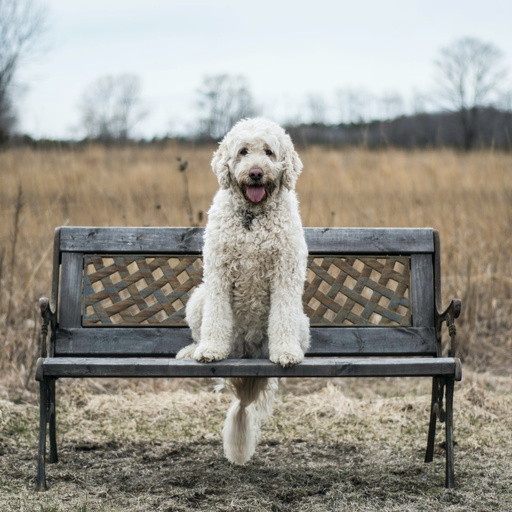

In [7]:
img_path = './img/bench_img.jpg'
img = Image.open(img_path)
img

## Loading the mask

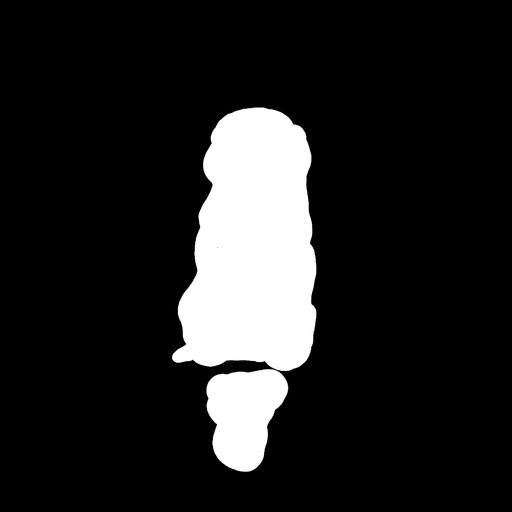

In [8]:
mask_path = './img/bench_img_mask.jpg'
img_mask = Image.open(mask_path)
img_mask

In [9]:
seed = 777

## Creating the prompt

  0%|          | 0/50 [00:00<?, ?it/s]

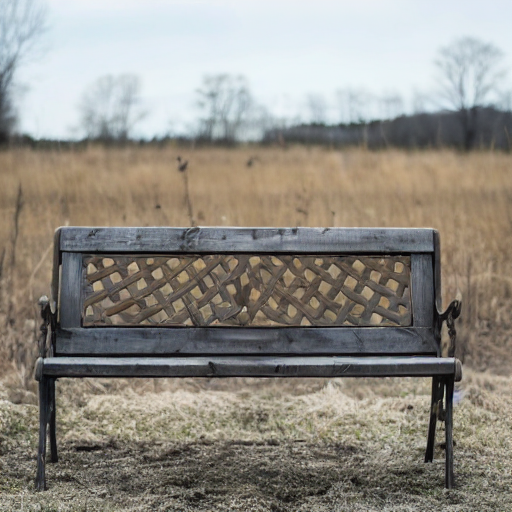

In [10]:
prompt = ""

generator = torch.Generator(device='cuda').manual_seed(seed)

result_img = pipe(
    prompt = prompt,
    image = img,
    mask_image = img_mask,
    generator=generator).images[0]

result_img

## Exchanging the objects

  0%|          | 0/50 [00:00<?, ?it/s]

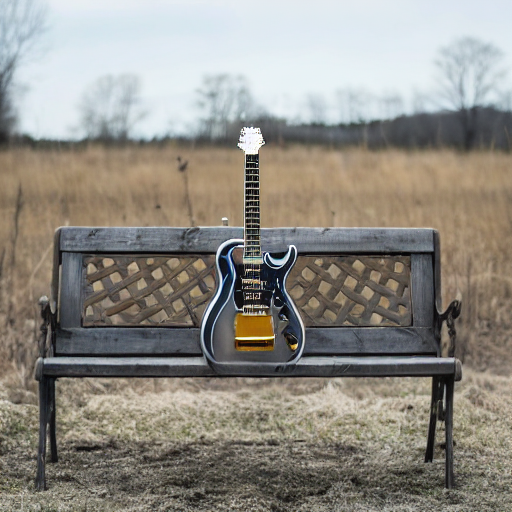

In [11]:
prompt = "an electric guitar"

generator = torch.Generator(device="cuda").manual_seed(seed)

result_img2 = pipe(
    prompt=prompt,
    image=img,
    mask_image=img_mask,
    generator=generator).images[0]

result_img2

  0%|          | 0/50 [00:00<?, ?it/s]

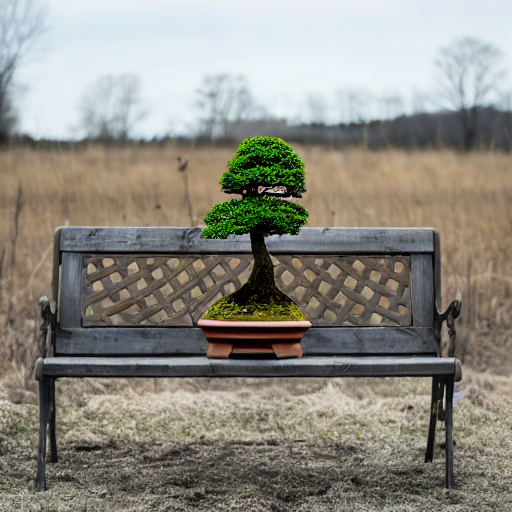

In [12]:
prompt = "a bonsai tree"

generator = torch.Generator(device="cuda").manual_seed(seed)

result_img3 = pipe(
    prompt=prompt,
    image=img,
    mask_image=img_mask,
    generator=generator).images[0]

result_img3

## Comparing the results

In [13]:
imgs = [img, result_img, result_img2, result_img3]
grid_img(imgs, rows=1, cols=len(imgs), scale=0.75)

AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'

### Other image

- Image source: https://www.freepik.com/free-photo/attractive-young-woman-walking-autumn-wearing-jacket-using-phone_27289740.htm



In [ ]:
img_path = "./img/bench02_img.jpg"
mask_path = "./img/bench02_img_mask.jpg"

img = Image.open(img_path)
img_mask = Image.open(mask_path)

grid_img([img, img_mask], rows=1, cols=2, scale=0.75)

In [ ]:
img.size

In [ ]:
w, h = img.size[0], img.size[1]
print(w, h)

In [ ]:
prompt = ""

generator = torch.Generator(device="cuda").manual_seed(seed)

result_img = pipe(
    prompt=prompt,
    image=img,
    mask_image=img_mask,
    width=w,
    height=h,
    generator=generator).images[0]

result_img

### Generating multiple images


In [ ]:
prompt = "a robot sitting on a bench"
num_imgs = 3

generator = torch.Generator(device="cuda").manual_seed(seed)

imgs = pipe(
    prompt=prompt,
    image=img,
    mask_image=img_mask,
    width=w,
    height=h,
    num_images_per_prompt=num_imgs,
    generator=generator).images

grid_img(imgs, rows=1, cols=len(imgs), scale=0.75)

## Other examples

- Image source: https://unsplash.com/pt-br/fotografias/_K0sTUUHQDE

In [ ]:
img_path = "./img/desert_img.jpg"
mask_path = "./img/desert_img_mask.jpg"

img = Image.open(img_path)
img_mask = Image.open(mask_path)

w, h = img.size[0], img.size[1]
print(w, h)

grid_img([img, img_mask], rows=1, cols=2, scale=0.75)

In [ ]:
prompt = "desert"

generator = torch.Generator(device="cuda").manual_seed(seed)

result_img = pipe(
    prompt=prompt,
    image=img,
    mask_image=img_mask,
    width=w,
    height=h,
    generator=generator).images[0]

result_img

In [ ]:
prompt = "a dragon in the desert"

generator = torch.Generator(device="cuda").manual_seed(seed)

result_img = pipe(
    prompt=prompt,
    image=img,
    mask_image=img_mask,
    width=w,
    height=h,
    generator=generator).images[0]

result_img

In [ ]:
prompt = ["an android walking in the desert",
          "a lighthouse in the desert",
          "a tree in the desert"]

guidance_scale = 6.5
num_samples = 1
generator = torch.Generator(device="cuda").manual_seed(seed)

imgs = pipe(
    prompt=prompt,
    image=img,
    mask_image=img_mask,
    guidance_scale=guidance_scale,
    width=w,
    height=h,
    generator=generator,
    num_images_per_prompt=num_samples,
).images

grid_img(imgs, rows=1, cols=len(imgs), scale=0.75)

* Other inpainting models: https://huggingface.co/models?library=diffusers&sort=downloads&search=inpainting
